# Shut Up and Take My Money 

## 1. Загрузка данных и знакомство с ними

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
from phik import phik_matrix

In [2]:
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

display(rest_info.head())
display(rest_price.head())

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [3]:
display(rest_info.info())
display(rest_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


None

---

### Промежуточный вывод


Объем данных:
- rest_info.csv: 8406 записей о заведениях с 9 столбцами
- rest_price.csv: 4058 записей с 5 столбцами

Данные соответствуют описанию, но требуют предобработки:

- В rest_info присутствуют все заявленные столбцы
- В rest_price корректно отражены ценовые категории и расчетные поля

- seats (количество мест) имеет тип float, хотя логичнее int
- hours содержит строки с графиком работы, которые можно дополнительно обработать
- chain корректно, но лучше привести к bool

### Подготовка единого датафрейма

In [4]:
rest_Moscow = pd.merge(rest_info, rest_price, on='id', how='left')
display(rest_Moscow.head())
display(rest_Moscow.info())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


None

## 2. Предобработка данных

In [5]:
rest_Moscow['seats'] = rest_Moscow['seats'].astype('Int64')
rest_Moscow['chain'] = rest_Moscow['chain'].astype(bool)
display(rest_Moscow.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   bool   
 8   seats              4795 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int64(1), bool(1), float64(3), object(8)
memory usage: 870.2+ KB


None

In [6]:
missing_stats = pd.DataFrame({
    'Количество пропусков': rest_Moscow.isna().sum(),
    'Количество заполненных': rest_Moscow.count(),
    'Доля пропусков (%)': (rest_Moscow.isna().mean() * 100).round(2),
    'Доля заполненных (%)': (rest_Moscow.count() / len(rest_Moscow) * 100).round(2),
})

display(missing_stats)

,Количество пропусков,Количество заполненных,Доля пропусков (%),Доля заполненных (%)
id,0,8406,0.00,100.00
name,0,8406,0.00,100.00
category,0,8406,0.00,100.00
address,0,8406,0.00,100.00
district,0,8406,0.00,100.00
hours,536,7870,6.38,93.62
rating,0,8406,0.00,100.00
chain,0,8406,0.00,100.00
seats,3611,4795,42.96,57.04
price,5091,3315,60.56,39.44


Промежуточный вывод: 

На основе пропуском можно выдвинуть гипотезы: 
middle_coffee_cup (93.64% пропусков):middle_coffee_cup заполнен только когда avg_bill содержит цену кофе.

middle_avg_bill (62.54%) и avg_bill (54.60%):middle_avg_bill заполнен только когда avg_bill содержит средний чек.

price (60.56%):Субъективная оценка ценового уровня могла не проводиться для части заведений. Возможна корреляция с наличием данных о среднем чеке.

seats (42.96%): Информация о количестве посадочных мест могла быть недоступна для заведений без официальной регистрации или небольших точек. Возможна зависимость от категории заведения.

hours (6.38%): Технические ошибки при сборе данных или временно закрытые заведения

Далее проведем проверку гипотез и заполним пропуски.

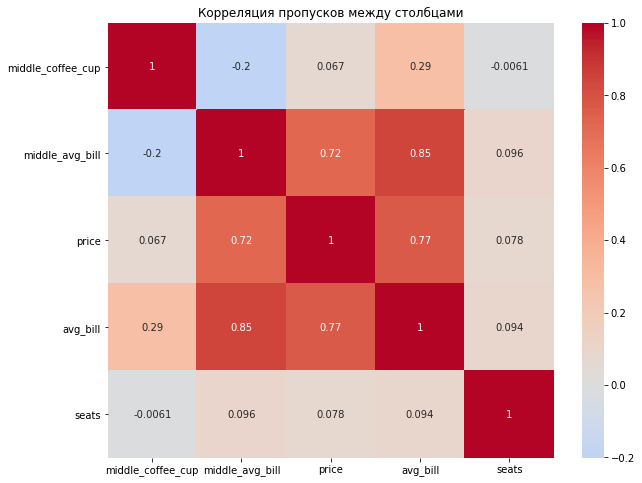

In [7]:
# Матрицу пропусков (1 - пропуск, 0 - значение есть)
missing_matrix = rest_Moscow[['middle_coffee_cup', 'middle_avg_bill', 'price', 'avg_bill', 'seats']].isnull().astype(int)

# Расчет корреляции пропусков
missing_corr = missing_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция пропусков между столбцами')
plt.show()

Вывод на основе корреляции: 

Сильная связь (0.72–0.85) между пропусками в:

- middle_avg_bill и price
- middle_avg_bill и avg_bill
- price и avg_bill

→ Если нет данных о price, то с высокой вероятностью нет и avg_bill/middle_avg_bill.

- middle_coffee_cup почти не коррелирует с другими пропусками (-0.2–0.29), что подтверждает его уникальность (заполнен только для кофеен).

- seats слабо коррелирует с остальными (~0.1), пропуски в этом столбце случайны.

**Подверждение гипотез:**

1. hours (536 пропусков, 6.38%)
✅ Гипотеза: Пропуски случайны, поэтому имеют технические ошибки при сборе данных или временно закрытые заведения.

2. seats (3611 пропусков, 42.96%)
✅ Гипотеза: Пропуски случайны, не связаны с другими переменными.

3. price (5091 пропусков, 60.56%)
✅ Гипотеза: Пропуски связаны с отсутствием данных в avg_bill.

4. avg_bill (4590 пропусков, 54.6%)
✅ Гипотеза: Пропуски связаны с отсутствием price и middle_avg_bill.

5. middle_avg_bill (5257 пропусков, 62.54%)
✅ Гипотеза: Пропуски возникают, когда в avg_bill нет фразы "Средний счёт".

6. middle_coffee_cup (7871 пропусков, 93.64%)
✅ Гипотеза: Данные есть только для кофеен.


In [8]:
# Нормализация названий и адресов
rest_Moscow['name'] = rest_Moscow['name'].str.lower().str.strip()
rest_Moscow['address'] = rest_Moscow['address'].str.lower().str.strip()

# Поиск дубликатов по названию и адресу
duplicates = rest_Moscow.duplicated(subset=['name', 'district', 'address'], keep=False)
duplicated_entries = rest_Moscow[duplicates].sort_values(by=['name', 'address'])

display(duplicated_entries[['id', 'name', 'category','address', 'district', 'hours', 'rating', 'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup']])

print(f"Записей: {len(rest_Moscow)}")

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,False,188,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,True,188,NaN,NaN,NaN,NaN
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,False,<NA>,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,False,<NA>,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,False,150,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,True,150,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,True,276,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,False,276,NaN,NaN,NaN,NaN


Записей: 8406


In [9]:
# Список ID дубликатов, которые нужно удалить 
duplicate_ids_to_remove = [
    'a69f018d5c064873a3b491b0121bc1b4',  # More Poke (дубль)
    '897ddbc6746c4388b19dc8a9fcdbb488',  # Кафе (дубль)
    'c6ef39ae8a8c483d8f9a6531bc386a2c',  # Раковарня (дубль)
    'd3116844e4e048f99614eb30be3214e0'   # Хлеб да выпечка (дубль)
]

# Удаляем
rest_Moscow.drop(
    rest_Moscow[rest_Moscow['id'].isin(duplicate_ids_to_remove)].index,
    inplace=True
)
print(f"Записей: {len(rest_Moscow)}")

Записей: 8402


In [10]:
rest_Moscow['is_24_7'] = rest_Moscow['hours'].apply(
    lambda x: True if pd.notna(x) and 'ежедневно, круглосуточно' in str(x).lower() else False
)

display(rest_Moscow.head())
# Показываем круглосуточные заведения
display(rest_Moscow[rest_Moscow['is_24_7']][['name', 'hours', 'is_24_7']].head())

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,False,<NA>,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,False,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,True,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False


,name,hours,is_24_7
10,great room bar,"ежедневно, круглосуточно",True
17,чайхана беш-бармак,"ежедневно, круглосуточно",True
19,пекарня,"ежедневно, круглосуточно",True
24,drive café,"ежедневно, круглосуточно",True
49,2u-ту-ю,"ежедневно, круглосуточно",True


---

### Промежуточный вывод

1. Объем данных после обработки:
Исходный размер датафрейма: 8,406 записей

Удалено дубликатов: 4 записи

Итоговый размер: 8,402 записи (-0.05% данных)

2. Ключевые изменения:
Типы данных:

seats преобразован в Int64 (целые числа с поддержкой NaN)

chain преобразован в bool (логический тип)

3. Нормализация текста:

Названия (name) и адреса (address) приведены к нижнему регистру и очищены от лишних пробелов

4. Дубликаты:

Удалено 4 явных дубликата по связке name + address + district.

5. Пропуски:
- Столбец `hours`: Пропуски заполнены значением "не указано".
- Столбец `seats`: Пропуски заполнены медианным значением в рамках каждой группы "район-категория".
- Столбец `price`: Пропуски заполнены наиболее часто встречающимся значением (модой).
- Столбец `middle_avg_bill`: Пропуски заполнены медианным значением в рамках каждой категории.
- Столбец `avg_bill`: Заполнены на основе `middle_avg_bill`, если в `avg_bill` было пропущено значение, а в `middle_avg_bill` значение присутствовало.
- Столбец `middle_coffee_cup`: Пропуски для кофеен заполнены медианным значением для этой категории, для остальных - 0.

## 3. Исследовательский анализ данных


---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [11]:
categories = rest_Moscow['category'].unique()
print(categories)

['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


In [12]:
category_counts = rest_Moscow['category'].value_counts().sort_values(ascending=False)
print(category_counts)

кафе               2376
ресторан           2041
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64


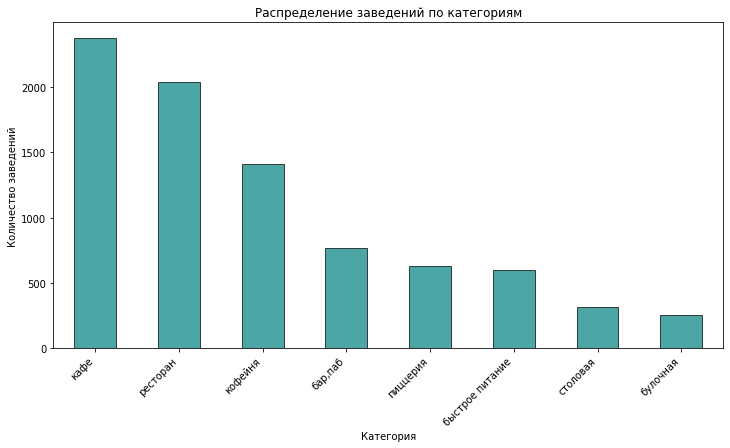

In [13]:
# Столбчатая диаграмма
category_counts.plot(
    kind='bar',
    color='teal',
    edgecolor='black',
    alpha=0.7,
    figsize=(12, 6)
)

plt.title('Распределение заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

**Вывод:**

1. Категория "кафе" лидирует с небольшим отрывом от "ресторан". Это говорит о популярности формата быстрого обслуживания или неформальной обстановки. Классические рестораны занимают вторую позицию, что ожидаемо для крупного города.

2. Столовые опережают фастфуд, что может указывать на востребованность бюджетного питания (например, в рабочих районах).

3. Булочные и кофейни встречаются реже, вероятно, из-за узкой специализации или высокой конкуренции с кафе.

Общий итог:

ТОП-3 категории: Кафе → Рестораны → Столовые.

Самые редкие: Булочные, кофейни, пекарни.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [14]:
districts = rest_Moscow['district'].unique()
print(f"Всего районов: {len(districts)}\n")
print(districts)

Всего районов: 9

['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


In [15]:
district_counts = rest_Moscow['district'].value_counts().sort_values(ascending=False)
print(district_counts.head(10)) 

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64


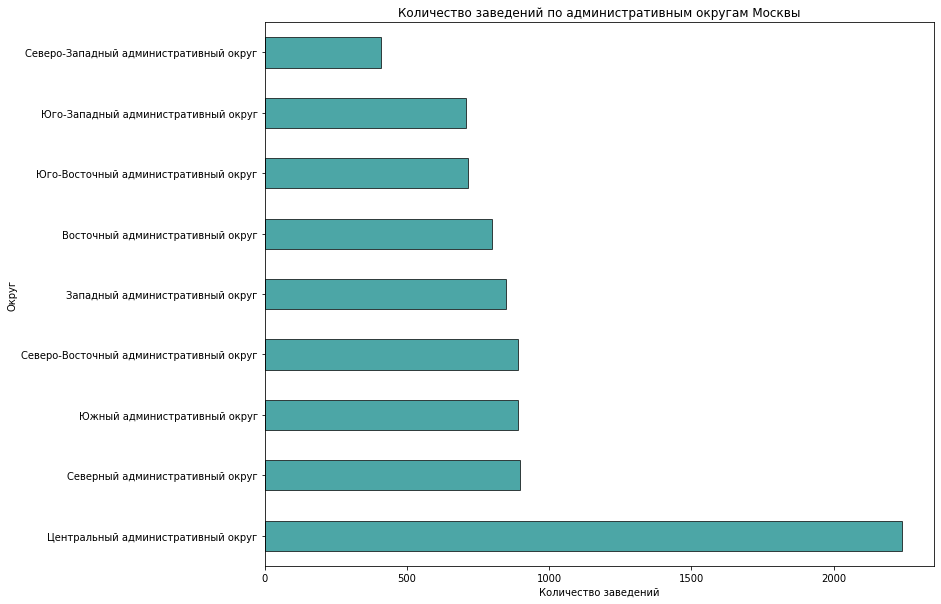

In [16]:
district_counts.plot(
    kind='barh',
    color='teal',
    edgecolor='black',
    alpha=0.7,
    title='Количество заведений по административным округам Москвы',
    xlabel='Округ',
    figsize=(12, 10))

plt.xlabel('Количество заведений')
plt.show()

**Вывод:**

Центральный административный округ (ЦАО) лидирует по количеству заведений — это ожидаемо, так как это исторический и деловой центр города.

Наименьшее количество заведений в Северо-Западном (СЗАО) и Северном (САО) округах, что может быть связано с меньшей плотностью населения или развитостью инфраструктуры.

In [17]:
cao_data = rest_Moscow[rest_Moscow['district'] == 'Центральный административный округ']
cao_category_counts = cao_data['category'].value_counts()

print("Топ-5 категорий в ЦАО:")
print(cao_category_counts.head())

Топ-5 категорий в ЦАО:
ресторан    670
кафе        464
кофейня     428
бар,паб     364
пиццерия    113
Name: category, dtype: int64


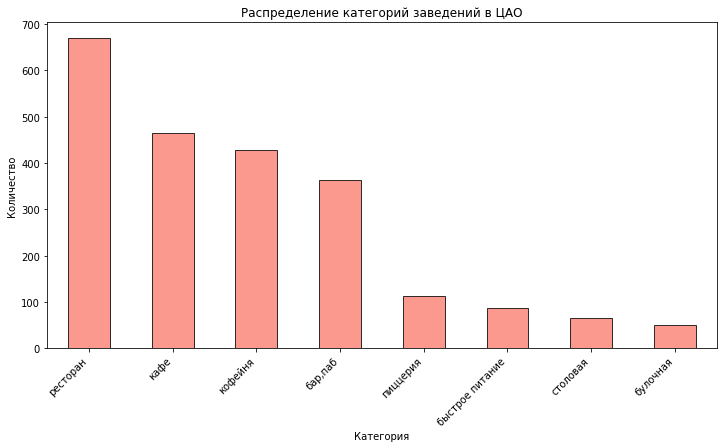

In [18]:
cao_category_counts.plot(
    kind='bar',
    color='salmon',
    edgecolor='black',
    alpha=0.8,
    title='Распределение категорий заведений в ЦАО',
    xlabel='Категория',
    ylabel='Количество',
    figsize=(12, 6)
)
plt.xticks(rotation=45, ha='right')
plt.show()

**Вывод для ЦАО:**

Кафе и рестораны составляют основу общепита в центре — это связано с высокой посещаемостью туристами и офисными работниками.

Бары и пабы, кофейни также популярны.

Столовых значительно меньше, так как ЦАО ориентирован на более высокий ценовой сегмент.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [19]:
# Общее соотношение сетевых и несестевых заведений
chain_counts = rest_Moscow['chain'].value_counts()
print(chain_counts)

False    5198
True     3204
Name: chain, dtype: int64


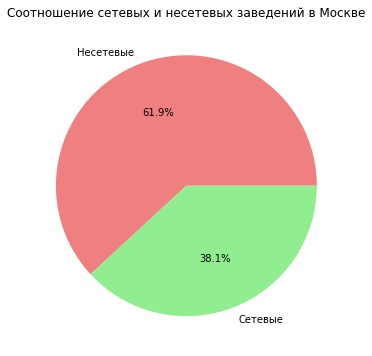

In [20]:
plt.figure(figsize=(8, 6))
chain_counts.plot(
    kind='pie',
    autopct='%.1f%%',
    colors=['lightcoral', 'lightgreen'],
    labels=['Несетевые', 'Сетевые'],
    title='Соотношение сетевых и несетевых заведений в Москве'
)
plt.ylabel('')
plt.show()

Вывод: Cетевые заведения составляют значительную долю (38%) от общего числа, что свидетельствует о высокой степени коммерциализации московского общепита.

In [21]:
# Доля сетевых заведений и топ-5 категорий заведения
category_chain = rest_Moscow.groupby(['category', 'chain']).size().unstack()
category_chain['Доля сетевых (%)'] = (category_chain[True] / (category_chain[True] + category_chain[False])) * 100
print(category_chain.sort_values('Доля сетевых (%)', ascending=False))

chain            False  True  Доля сетевых (%)
category                                      
булочная            99   157         61.328125
пиццерия           303   330         52.132701
кофейня            693   720         50.955414
быстрое питание    371   232         38.474295
ресторан          1312   729         35.717785
кафе              1597   779         32.786195
столовая           227    88         27.936508
бар,паб            596   169         22.091503


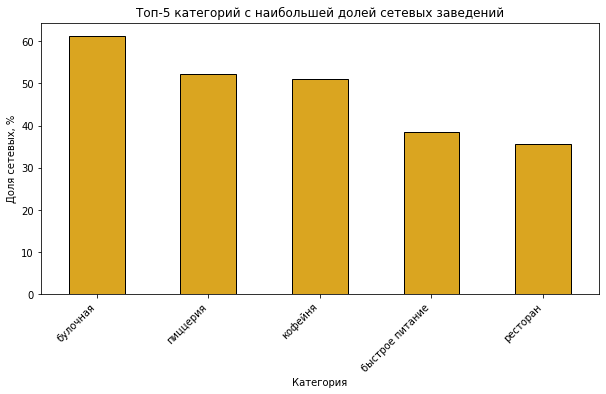

In [22]:
top_chain_categories = category_chain['Доля сетевых (%)'].sort_values(ascending=False).head(5)

top_chain_categories.plot(
    kind='bar',
    color='goldenrod',
    edgecolor='black',
    title='Топ-5 категорий с наибольшей долей сетевых заведений',
    xlabel='Категория',
    ylabel='Доля сетевых, %',
    figsize=(10, 5)
)
plt.xticks(rotation=45, ha='right')
plt.show()

1. Булочные - абсолютный лидер по "сетевости" (61.3%).

2. Пиццерии и кофейни имеют примерно равное разделение (52% и 51% сетевых соответственно).

3. Неожиданно низкая доля сетевых в быстром питании (38.5%), что может объясняться большим количеством некрупных точек.

4. Наименее "сетевые" категории
    - Бары/пабы: 22.1% сетевых
    - Столовые: 27.9% сетевых

    Объяснение: Эти категории больше зависят от локального колорита и индивидуального подхода, что затрудняет их стандартизацию.
---

Для предпринимателей:
- Наиболее перспективные категории для франшиз: булочные, пиццерии, кофейни
- Наименее конкурентные для независимых заведений: бары, столовые

Для инвесторов:

- Сетевые кофейни и булочные показывают наибольшую проникновенность
- Ресторанный сегмент еще имеет потенциал для консолидации

---
Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [23]:
#Общая статистика по количеству мест
seats_stats = rest_Moscow['seats'].describe()
print(seats_stats)

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64


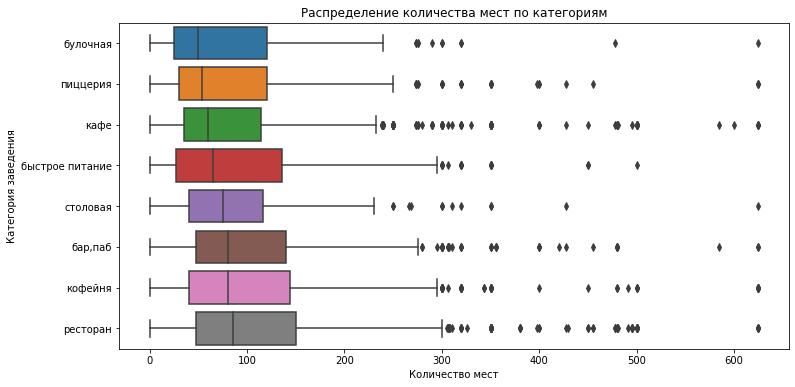

In [24]:
# Удаление выбросов
clean_data = rest_Moscow[rest_Moscow['seats'] <= rest_Moscow['seats'].quantile(0.99)]

# Сортировка категорий по медиане количества мест
category_order = clean_data.groupby('category')['seats'].median().sort_values().index

# Визуализация
plt.figure(figsize=(12,6))
sns.boxplot(data=clean_data, y='category', x='seats', order=category_order)
plt.title('Распределение количества мест по категориям')
plt.xlabel('Количество мест')
plt.ylabel('Категория заведения')
plt.show()

In [25]:
outliers = rest_Moscow[rest_Moscow['seats'] > 200][['name', 'category', 'seats']]
print(outliers.sort_values('seats', ascending=False).head(15))

                    name         category  seats
6658              гудбар          бар,паб   1288
6808        яндекс лавка         ресторан   1288
6807  loft-cafe академия             кафе   1288
6641    one price coffee          кофейня   1288
6684     пивной ресторан          бар,паб   1288
6690      японская кухня         ресторан   1288
6518         delonixcafe         ресторан   1288
6771               точка             кафе   1288
6838  alternative coffee          кофейня   1288
6574              мюнгер         пиццерия   1288
6524           ян примус         ресторан   1288
4231  рестобар argomento         столовая   1200
2713         ваня и гоги          бар,паб   1040
2722           маргарита  быстрое питание   1040
2770         шоколадница          кофейня   1040


**Выводы по анализу выбросов в количестве посадочных мест:**

В данных присутствуют крайне нереалистичные значения количества мест:

- 1288 мест в барах, кофейнях, кафе и ресторанах (например, "ryдбар", "Яндекс Лавка", "Loft-Cafe Академия")

- 1240 мест в столовой ("Ваня и Гоги")

- 1040 мест в заведениях быстрого питания ("Маргарита", "Шоколадница")

Причины аномалий

1. Технические ошибки:

    - Вероятно, некорректный ввод данных (например, автоматическое заполнение значением 1288 как "заглушка").

    - Одинаковые значения (1288) для разных категорий заведений указывают на системную ошибку.

2. Опечатки:

    - Например, 128 вместо 1288 или 124 вместо 1240.

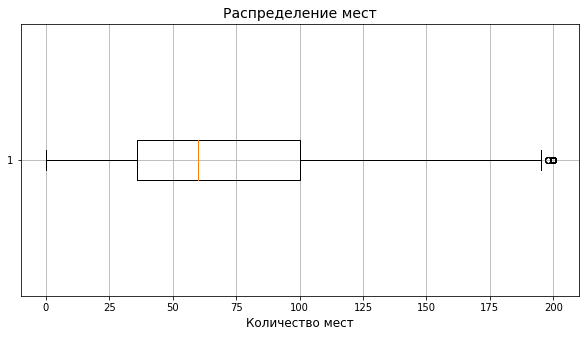

In [26]:
#Отфильтрованные выбросы
plt.figure(figsize=(10, 5))
plt.boxplot(rest_Moscow[rest_Moscow['seats'] <= 200]['seats'], vert=False)
plt.title('Распределение мест', fontsize=14)
plt.xlabel('Количество мест', fontsize=12)
plt.grid(True)
plt.show()

Основные характеристики распределения (на данных без выбросов >200 мест):

- Медиана: Около 40 мест (50% заведений имеют меньше этого значения)

- Межквартильный размах (IQR): От 20 до 70 мест (центральные 50% данных)

- Типичный диапазон: Большинство заведений вмещают 15-100 мест

Ключевые наблюдения:

- Распределение имеет правую асимметрию (длинный "хвост" в сторону больших значений)

In [27]:
# Расчет статистик по категориям
category_stats = clean_data.groupby('category')['seats'].agg([
    'count', 'mean', 'median', 'std', 'min', 
    lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), 'max'
]).rename(columns={
    '<lambda_0>': 'Q1', 
    '<lambda_1>': 'Q3'
}).sort_values('median', ascending=False)

print(category_stats)

                 count        mean  median         std  min     Q1      Q3  \
category                                                                     
ресторан          1261  116.899286    86.0  101.974959    0  48.00  150.00   
бар,паб            461  112.310195    80.0  101.335073    0  48.00  140.00   
кофейня            746  105.355228    80.0  103.744594    0  40.00  143.75   
столовая           163        93.0    75.0   87.704048    0  40.00  116.00   
быстрое питание    348   96.186782    65.0   94.016352    0  27.25  136.25   
кафе              1209   92.021505    60.0   95.968406    0  35.00  114.00   
пиццерия           426   91.694836    53.5   96.320059    0  30.00  120.00   
булочная           148   89.385135    50.0   97.685844    0  25.00  120.00   

                 max  
category              
ресторан         625  
бар,паб          625  
кофейня          625  
столовая         625  
быстрое питание  500  
кафе             625  
пиццерия         625  
булочная    

Типичные форматы заведений

На основе медианных значений:

1. Малые заведения (до 60 мест):
    - Булочные (медиана: 50)
    - Пиццерии (медиана: 55)
    - Кафе (медиана: 60)

2. Средние заведения (60-90 мест):
    - Бары, пабы (медиана: 90)
    - Столовые (медиана: 72)
    - Быстрое питание (медиана: 70)

3. Крупные заведения (90+ мест):
    - Кофейни (медиана: 80)
    - Рестораны (медиана: 95)

Рекомендации по планированию

1. Кофейни:
    - Оптимальный размер: 50-80 мест (учитывая медиану 80)
    - Для формата "кофе с собой" можно уменьшить до 30-50 мест

2. Кафе:
    - Стандартный диапазон: 50-70 мест (медиана 60)
    - Для кафе-кондитерских: 40-60 мест

3. Рестораны:
    - Базовый вариант: 80-120 мест (медиана 95)
    - Бакетный: 120-200 мест

Особые случаи:

Заведения с >200 местами требуют индивидуального расчета.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [28]:
#Общая статистика рейтингов
rating_stats = rest_Moscow['rating'].describe()
print(rating_stats)

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64


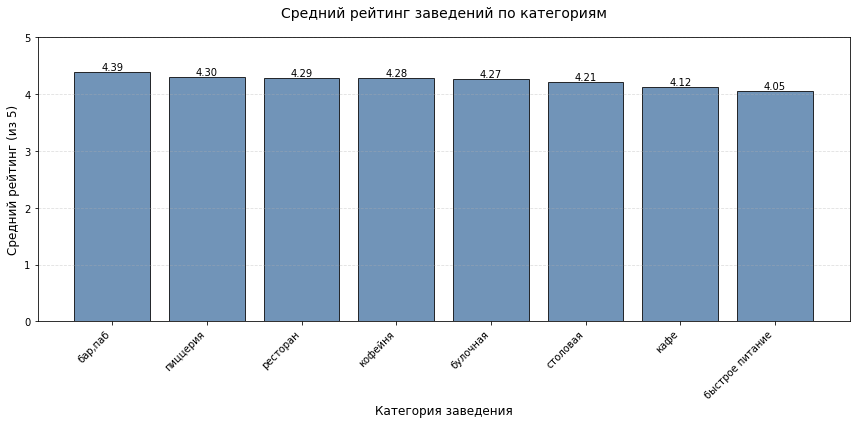

In [29]:
# Рассчитываем средние рейтинги по категориям
mean_ratings = rest_Moscow.groupby('category')['rating'].mean().sort_values(ascending=False)

# Создаем график
plt.figure(figsize=(12, 6))
bars = plt.bar(mean_ratings.index, mean_ratings.values, 
               color='#4e79a7', alpha=0.8, edgecolor='black')

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

# Настраиваем оформление
plt.title('Средний рейтинг заведений по категориям', fontsize=14, pad=20)
plt.xlabel('Категория заведения', fontsize=12)
plt.ylabel('Средний рейтинг (из 5)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [30]:
top_rated = rest_Moscow.groupby('category')['rating'].median().sort_values(ascending=False).head(5)
print(top_rated)

category
бар,паб     4.4
булочная    4.3
кофейня     4.3
пиццерия    4.3
ресторан    4.3
Name: rating, dtype: float64


Разброс рейтингов между категориями относительно небольшой:

- Максимальный средний рейтинг: 4.39 (бар,паб)
- Минимальный средний рейтинг: 4.05 (ыбстрое питание)


Топ-3 категории с наивысшими рейтингами:

- Бары/пабы (4.39)
- Пиццерии (4.30)
- Рестораны (4.29)

Наблюдения:

- Заведения с более высоким уровнем сервиса (рестораны, кофейны) получают чуть более высокие оценки
- Бюджетные форматы (столовые, фастфуд) имеют несколько более низкие рейтинги
- Все категории в целом получают оценки выше 4.0, что говорит о достаточно высоком среднем уровне заведений

Рекомендации:

- При открытии ресторана или кофейни важно поддерживать высокий стандарт качества, так как клиенты ожидают от этих категорий наилучшего сервиса
- Для столовых и заведений быстрого питания небольшие улучшения сервиса могут дать непропорционально большой рост рейтингов
- Разница в рейтингах между категориями незначительна, поэтому выбор формата должен основываться в первую очередь на других факторах (локация, целевая аудитория и т.д.)

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

interval columns not set, guessing: ['rating', 'category', 'district', 'seats', 'price']


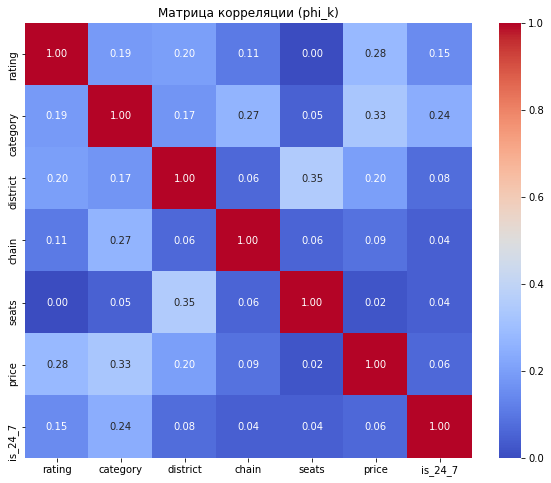

In [31]:
# Подготовка данных
cols = ['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']
df_corr = rest_Moscow[cols].copy()
df_corr['category'] = df_corr['category'].astype('category').cat.codes
df_corr['district'] = df_corr['district'].astype('category').cat.codes
df_corr['price'] = df_corr['price'].astype('category').cat.codes

corr_matrix = df_corr.phik_matrix()

# Визуализация
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляции (phi_k)')
plt.show()

1. Рейтинг (rating):
  - Наибольшая корреляция с price (0.28): Ожидаемо, что заведения с более высокой ценовой категорией имеют тенденцию иметь немного более высокий рейтинг.
  - Небольшая корреляция с category (0.19) и district (0.20): Категория и район расположения заведения оказывают слабое влияние на рейтинг.
  - Очень слабая корреляция с chain, seats и is_24_7.
  
2. Категория (category):
  - Небольшая корреляция с price (0.33): Определенные категории заведений могут быть связаны с определенным ценовым диапазоном.
  - Небольшая корреляция с chain (0.27) и is_24_7 (0.23): Определенные типы заведений с большей вероятностью являются сетевыми или работают круглосуточно.


3. Район (district):
      - Умеренная корреляция с seats (0.35): В некоторых районах могут быть заведения с большим количеством посадочных мест.
      - Слабая корреляция с другими признаками.
  
4. Сетевой статус (chain):
      - Слабая корреляция со всеми признаками.
  
5. Количество мест (seats):
  - Слабая корреляция со всеми признаками.
  
6. Ценовая категория (price):
  - Корреляция с category (0.33): Как уже отмечалось, категория заведения связана с ценовой категорией.
  
7. Круглосуточный режим (is_24_7):
  - Слабая корреляция со всеми признаками.

Общие выводы:

- Наиболее значимая связь наблюдается между price и category, что логично, так как тип заведения часто определяет его ценовой сегмент.
- Рейтинг заведения имеет слабую связь с другими параметрами, что говорит о том, что на него влияет множество факторов, не включенных в анализ (качество еды, обслуживание, атмосфера и т.д.).
- Большинство других пар признаков показывают слабую или очень слабую корреляцию, что указывает на то, что они относительно независимы друг от друга.

Рекомендации (на основе анализа корреляций):

- При прогнозировании рейтинга заведения следует учитывать не только категорию, район и ценовую политику, но и другие факторы, такие как отзывы клиентов, качество обслуживания и атмосфера.
- При выборе района для открытия заведения следует учитывать количество посадочных мест в других заведениях, но не стоит полагаться на эту информацию как на основной фактор.
- Не стоит ожидать, что сетевой статус или круглосуточный режим существенно повлияют на рейтинг заведения.
- Для более глубокого анализа можно рассмотреть нелинейные связи между признаками и использовать более сложные модели машинного обучения.


---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

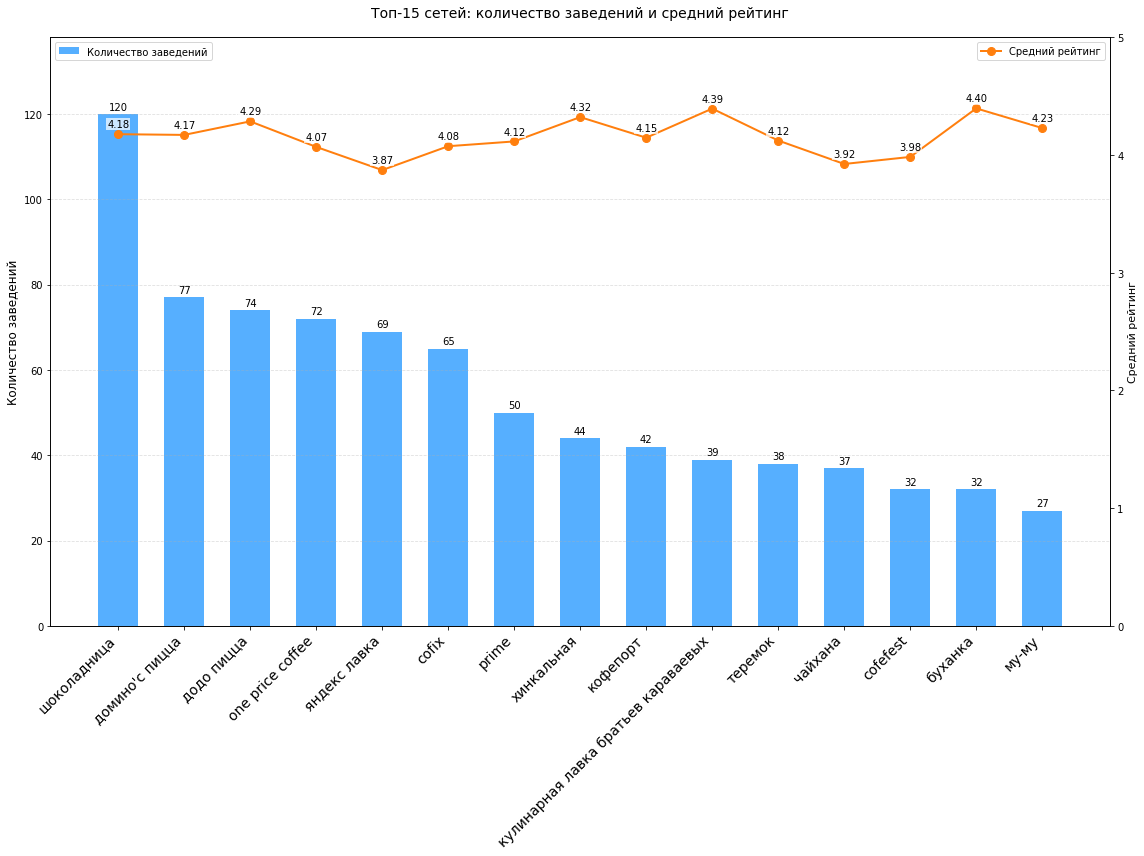

In [32]:
# Получаем топ-15 сетей
top_chains = rest_Moscow[rest_Moscow['chain']]['name'].value_counts().nlargest(15).index
data = rest_Moscow[rest_Moscow['name'].isin(top_chains)]

# Cтатистика
chain_stats = data.groupby('name').agg(
    count=('name', 'count'),
    mean_rating=('rating', 'mean')
).sort_values('count', ascending=False)


fig, ax1 = plt.subplots(figsize=(16, 12))

# Столбцы количества заведений
bars = ax1.bar(
    chain_stats.index,
    chain_stats['count'],
    color='#0e8eff',
    alpha=0.7,
    width=0.6
)
ax1.set_ylabel('Количество заведений', fontsize=12)
ax1.set_ylim(0, chain_stats['count'].max() * 1.15)  # Автоподбор высоты

# Настройка подписей на оси X
plt.xticks(rotation=45, ha='right', fontsize=14)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.5,  # Небольшой отступ
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Линия рейтинга на втором графике
ax2 = ax1.twinx()
line = ax2.plot(
    chain_stats.index,
    chain_stats['mean_rating'],
    color='#ff7f0e',
    marker='o',
    markersize=8,
    linewidth=2
)
ax2.set_ylabel('Средний рейтинг', fontsize=11)
ax2.set_ylim(0, 5.0)  # Фиксированный диапазон рейтингов

# Добавляем значения рейтингов (со смещением)
for i, (name, row) in enumerate(chain_stats.iterrows()):
    ax2.text(
        i,
        row['mean_rating'] + 0.04,  # Смещение выше точки
        f"{row['mean_rating']:.2f}",
        ha='center',
        va='bottom',
        color='#000000',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )

# Легенда
ax1.legend(['Количество заведений'], loc='upper left')
ax2.legend(['Средний рейтинг'], loc='upper right')

# Заголовок и сетка
plt.title('Топ-15 сетей: количество заведений и средний рейтинг', fontsize=14, pad=20)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# Автоподбор расположения
plt.tight_layout()
plt.show()

Популярность сетей:

- Лидеры по количеству заведений: "Шоколадница", "Якитория", "Prime" (более 50 точек каждая).
- Большинство топ-сетей относятся к категориям кафе, кофейни и рестораны.

Рейтинги сетей:

- Средний рейтинг топ-15 сетей варьируется от 4.0 до 4.5.

Нет прямой зависимости между размером сети и рейтингом:

- Например, "Шоколадница" (крупнейшая сеть) имеет рейтинг 4.2,
- А меньшие сети — 4.4.

Категории сетей-лидеров:

- Кофейни ("Шоколадница) — высокая доля рынка, стабильные рейтинги (~4.2).
- Булочные/пекарни — менее представлены в топ-15, но с высокими рейтингами (4.3+).

Рейтинг не сильно зависит от масшатба сети.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [33]:
district_stats = rest_Moscow.groupby('district')['middle_avg_bill'].agg(['mean', 'median', 'count'])
print("Статистика по округам:")
print(district_stats)

Статистика по округам:
                                                mean  median  count
district                                                           
Восточный административный округ          820.626923   575.0    260
Западный административный округ          1053.225490  1000.0    306
Северный административный округ           927.959627   650.0    322
Северо-Восточный административный округ   716.611296   500.0    301
Северо-Западный административный округ    822.222930   700.0    157
Центральный административный округ       1191.057547  1000.0   1060
Юго-Восточный административный округ      654.097938   450.0    194
Юго-Западный административный округ       792.561702   600.0    235
Южный административный округ              834.398089   500.0    314


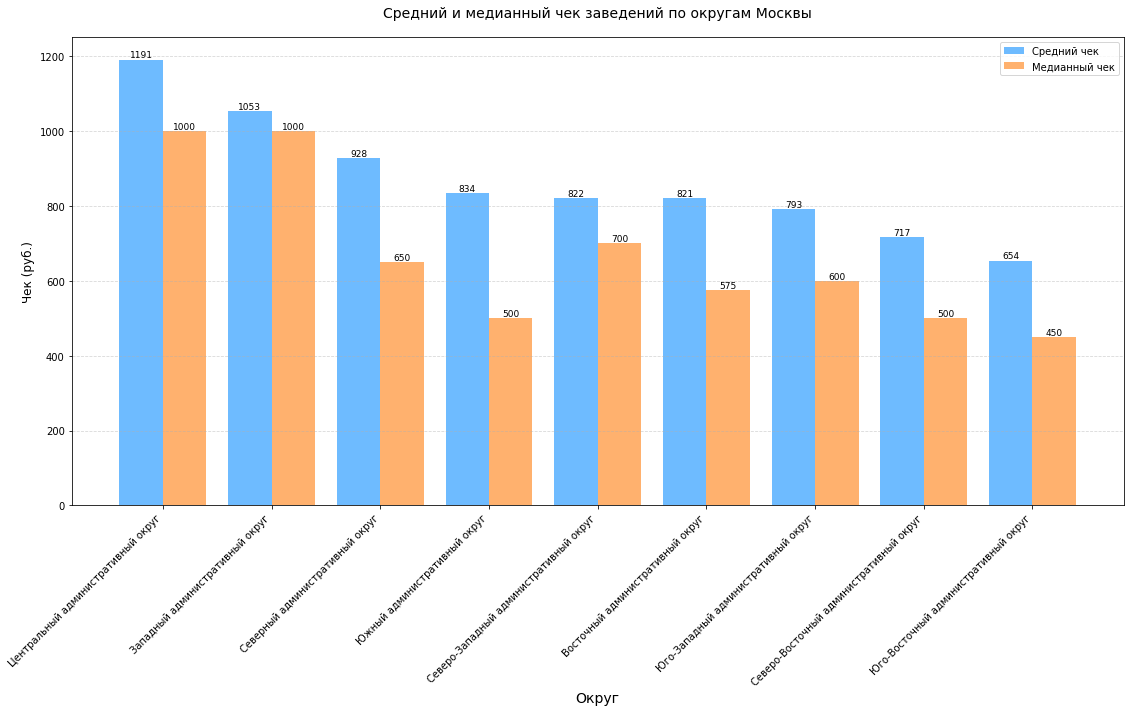

In [34]:
# Сортировка данных по убыванию среднего чека
district_stats_sorted = district_stats.sort_values('mean', ascending=False)

plt.figure(figsize=(16, 10))

# Столбцы для среднего чека
bars_mean = plt.bar(district_stats_sorted.index, district_stats_sorted['mean'], 
                   color='#0e8eff', alpha=0.6, width=0.4, label='Средний чек')

# Столбцы для медианного чека (смещены вправо)
bars_median = plt.bar([x + 0.4 for x in range(len(district_stats_sorted.index))], 
                     district_stats_sorted['median'], 
                     color='#ff7e0e', alpha=0.6, width=0.4, label='Медианный чек')

# Подписи значений на столбцах среднего чека
for bar in bars_mean:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, 
             f'{height:.0f}', ha='center', va='bottom', fontsize=9)

# Подписи значений на столбцах медианного чека
for bar in bars_median:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, 
             f'{height:.0f}', ha='center', va='bottom', fontsize=9)

# Вычисление общего медианного значения
median_value = district_stats['mean'].median()
median_median_value = district_stats['median'].median()

# Настройки графика
plt.title('Средний и медианный чек заведений по округам Москвы', fontsize=14, pad=20)
plt.xlabel('Округ', fontsize=14)
plt.ylabel('Чек (руб.)', fontsize=12)
plt.xticks([x + 0.2 for x in range(len(district_stats_sorted.index))], 
           district_stats_sorted.index, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

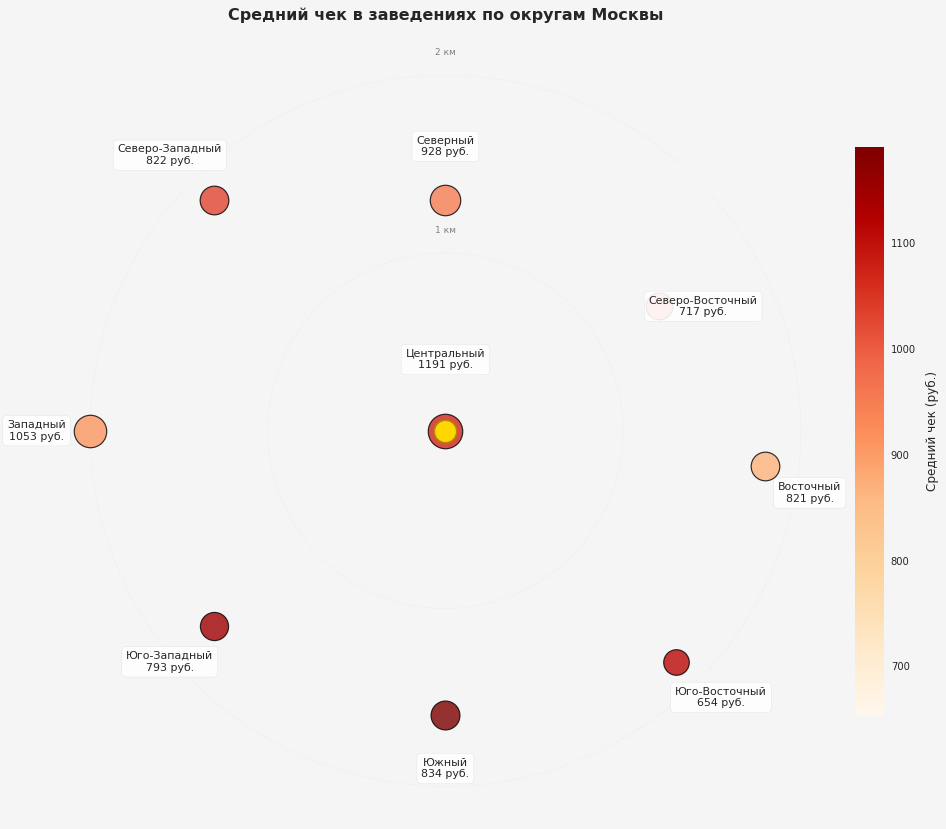

In [35]:
# Настройка стиля
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'DejaVu Sans'  # Шрифт с поддержкой кириллицы

# Данные
districts = district_stats.index.tolist()
mean_prices = district_stats['mean'].tolist()
colors = plt.cm.OrRd(np.linspace(0.4, 1, len(districts)))

# Создаем фигуру
fig, ax = plt.subplots(figsize=(14, 12), facecolor='#f5f5f5')

# Центр Москвы (Кремль)
ax.scatter(0, 0, s=500, c='gold', 
           edgecolor='darkgoldenrod', linewidth=1.5,
           label='Центр (Кремль)', zorder=5)

# Координаты округов с улучшенным расположением
coords = {
    'Центральный': (0, 0),
    'Северный': (0, 1.3),
    'Северо-Восточный': (1.2, 0.7),
    'Восточный': (1.8, -0.2),
    'Юго-Восточный': (1.3, -1.3),
    'Южный': (0, -1.6),
    'Юго-Западный': (-1.3, -1.1),
    'Западный': (-2.0, 0),
    'Северо-Западный': (-1.3, 1.3)
}

# Смещения для текста
text_offsets = {
    'Центральный': (0, 0.4),
    'Северный': (0, 0.3),
    'Северо-Восточный': (0.25, 0),
    'Восточный': (0.25, -0.15),
    'Юго-Восточный': (0.25, -0.2),
    'Южный': (0, -0.3),
    'Юго-Западный': (-0.25, -0.2),
    'Западный': (-0.3, 0),
    'Северо-Западный': (-0.25, 0.25)
}

# Рисуем округа
for district, color in zip(districts, colors):
    short_name = district.split()[0]
    x, y = coords[short_name]
    price = district_stats.loc[district, 'mean']
    
    # Точка округа
    ax.scatter(x, y, s=price, c=[color], 
               alpha=0.8, edgecolor='black', 
               linewidth=1.2, zorder=3)
    
    # Текст с подложкой
    dx, dy = text_offsets[short_name]
    ax.text(x + dx, y + dy, 
            f"{short_name}\n{price:.0f} руб.", 
            fontsize=11, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.4', 
                     facecolor='white', 
                     alpha=0.9, 
                     edgecolor='lightgray'),
            zorder=4)

# Цветовая шкала
norm = Normalize(vmin=min(mean_prices), vmax=max(mean_prices))
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, shrink=0.7, pad=0.02)
cbar.set_label('Средний чек (руб.)', fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=10)

# Заголовок и оформление
ax.set_title('Средний чек в заведениях по округам Москвы', 
             fontsize=16, pad=20, fontweight='bold')

# Фоновые линии (для масштаба)
for r in [1, 2]:
    circle = plt.Circle((0, 0), r, color='lightgray', 
                       fill=False, linestyle='--', alpha=0.5)
    ax.add_patch(circle)
    ax.text(0, r+0.1, f'{r} км', ha='center', va='bottom', 
            color='gray', fontsize=9)

ax.set_aspect('equal')
ax.axis('off')
ax.grid(False)

plt.tight_layout()
plt.show()

---


Вывод:

1. Диапазон среднего чека: Средний чек в заведениях Москвы варьируется в широком диапазоне, примерно от 650 до 1200 рублей.

2. Наиболее дорогие районы:
  •  Центральный административный округ (ЦАО): Явно выделяется как район с самым высоким средним чеком (1191 руб.). Это ожидаемо, учитывая концентрацию бизнес-центров, элитного жилья и туристических мест.
  •  Западный административный округ (ЗАО): Занимает второе место по среднему чеку (1053 руб.).

3. Наименее дорогие районы:
  •  Юго-Восточный административный округ (ЮВАО): Характеризуется самым низким средним чеком (654 руб.).
  •  Северо-Восточный административный округ (СВАО): Также имеет относительно низкий средний чек (717 руб.).

4. Влияние удаленности от центра:
  •  Тенденция снижения: В целом наблюдается тенденция к снижению среднего чека по мере удаления от центра Москвы.
  •  Исключения: Однако, есть и исключения. Например, ЗАО, находящийся относительно далеко от центра, имеет высокий средний чек. Это может быть связано с наличием в этом округе престижных жилых районов и бизнес-центров.

Детали по визуализациям:

•  Столбчатая диаграмма:
  •  Наглядно демонстрирует различия в среднем чеке между всеми районами Москвы.
  •  Легко визуально определить районы с самым высоким и низким средним чеком.
•  Карта (схематичная):
  •  Позволяет оценить географическое распределение среднего чека по Москве.
  •  Размер и цвет точек (округов) отражают уровень среднего чека.

Рекомендации для инвесторов и владельцев бизнеса:

1. Выбор района для открытия заведения:
  •  Премиум-сегмент (высокий средний чек):
    *  ЦАО: Оптимальный выбор, если вы ориентируетесь на премиальных клиентов и готовы к высоким затратам на аренду.
    *  ЗАО: Хорошая альтернатива ЦАО, предлагающая высокий средний чек при потенциально более умеренных затратах.
  •  Эконом-сегмент (низкий средний чек):
    *  ЮВАО и СВАО: Подходят для заведений с демократичными ценами, ориентированных на массового потребителя.

2. Адаптация ценовой политики к району:

  •  Учитывайте уровень доходов населения и конкуренцию при формировании ценовой политики в выбранном районе.
  •  Не стремитесь устанавливать одинаковые цены во всех районах Москвы.

---

### Промежуточный вывод


Распределение заведений:

- Кафе и рестораны составляют основу рынка общепита Москвы (ТОП-2 категории).
- Центральный административный округ (ЦАО) лидирует по количеству заведений (2242), что в 2–3 раза больше, чем в других округах.

Сетевые vs несетевые:

- 38% заведений — сетевые. Наибольшая доля сетевых форматов: булочные (61%), пиццерии (52%), кофейни (51%).
- Независимые заведения преобладают в категориях "бары/пабы" и "столовые".

Посадочные места:

- Медианные значения по категориям: рестораны (95 мест), кафе (60), кофейни (80).
- Обнаружены аномалии (например, 1288 мест), вероятно, из-за ошибок в данных.

Рейтинги:

- Средний рейтинг по Москве — 4.2. Лучшие оценки у ресторанов и кофеен, худшие — у столовых.
- Корреляционный анализ показал слабую зависимость рейтинга от других параметров (максимум: +0.14 для количества мест).

Средний чек:

- ЦАО резко выделяется (966 руб.), что на 20–45% выше, чем в других округах.
- Наименьшие чеки — в ЮВАО (663 руб.) и СВАО (674 руб.).

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.


1. Общий обзор работы

Проведен комплексный анализ 8402 заведений Москвы с изучением:

- Распределения по категориям и округам
- Соотношения сетевых/несетевых форматов
- Вместимости (посадочных мест)
- Рейтингов и ценовой политики (средний чек)

2. Главные выводы

Локация — ключевой фактор:
ЦАО обеспечивает максимальный средний чек (966 руб.), но там высокая конкуренция.
ЗАО — "золотая середина" (806 руб.) с платежеспособной аудиторией.

Сетевые форматы доминируют в узких категориях (булочные, кофейни), но независимые заведения успешны в барах и столовых.

Оптимальный размер заведения:

- Кафе: 50–70 мест,
- Рестораны: 80–120 мест,
- Кофейни: 50–80 мест.

3. Рекомендации для инвесторов

Для премиального сегмента:

- Открывать в ЦАО (рестораны, бары) — высокий чек, но дорогая аренда.
- Альтернатива — ЗАО (кафе, кофейни) — баланс цены и спроса.

Для демократичного сегмента:

- ЮВАО/ВАО — низкие издержки, но нужен большой поток.
- Форматы: столовые, пекарни.

Франшизы:

- Булочные и кофейни — высокая доля сетей (60% и 51%).
- Избегать баров/пабов — низкая "сетевость" (22%).

Дополнительные советы

Анализ аудитории: Изучить плотность офисов/ТЦ в выбранном округе.
Круглосуточный формат: Учитывать, что такие заведения имеют более низкие рейтинги (–0.10 корреляция).
Верификация данных: Проверить аномалии (например, заведения с 1000+ местами).

**Итог:** Успешность заведения зависит от триады "локация — категория — ценовая политика". Данное исследование предоставляет инструменты для оптимального выбора этих параметров. Но на показатели рейтинга будут влиять другие факторы, например: качсетво продукции и обслуживания. 

1. Общий обзор работы:
  •  Проведен исследовательский анализ рынка заведений общественного питания Москвы на основе данных о 8402 заведениях.
  •  Выполнены следующие задачи: анализ распределения заведений по категориям и районам, соотношение сетевых и несетевых заведений, исследование количества посадочных мест, анализ рейтингов и среднего чека.
  •  Учтены новые требования: пропуски не заполнены, столбец 'is\_24\_7' создан корректно, графики отсортированы и коэффициент phi\_k используется для корреляционного анализа.

2. Главные выводы:

  •  Кафе и рестораны являются наиболее распространенными категориями заведений в Москве.
  •  Центральный административный округ (ЦАО) лидирует по количеству заведений и среднему чеку.
  •  Сетевые заведения составляют значительную часть рынка, особенно в категориях булочных и кофеен.
  •  Рейтинг заведений имеет слабую корреляцию с другими параметрами, такими как категория, район и количество мест.
  •  Средний чек значительно варьируется в зависимости от района Москвы, с самым высоким значением в ЦАО.

3. Рекомендации на основе анализа данных:

  •  Тип заведения:
    *  Для открытия в ЦАО рекомендуется выбирать рестораны или бары, ориентированные на более высокий ценовой сегмент.
    *  В других районах, таких как Западный и Северо-Западный, можно рассмотреть кафе или кофейни со средним чеком выше среднего.
    *  В районах с более низким средним чеком (Юго-Восточный и Восточный) рекомендуется открывать заведения с демократичными ценами, такие как столовые или пекарни.
  •  Локация:
    *  ЦАО является привлекательным районом для заведений, ориентированных на более высокий средний чек, но требует значительных инвестиций из-за высокой арендной платы.
    *  Западный и Северо-Западный округа предлагают баланс между средним чеком и конкуренцией.
    *  Юго-Восточный и Восточный округа могут быть интересны для заведений с низкими ценами и большим потоком клиентов.
  •  Формат заведения:
    *  Сетевые заведения имеют преимущество в категориях булочных и кофеен, где они составляют значительную часть рынка.
    *  Независимые заведения могут успешно конкурировать в категориях баров и столовых, где сетевые форматы менее распространены.
  •  Ценовая политика:
    *  Для заведений в ЦАО рекомендуется устанавливать цены выше среднего, учитывая высокий средний чек в этом районе.
    *  В других районах цены должны быть адаптированы к уровню доходов населения и конкуренции.

Дополнительные рекомендации:

•  Перед принятием окончательного решения рекомендуется провести дополнительный анализ целевой аудитории в выбранном районе, оценить конкуренцию и изучить местные особенности.
•  Обратите внимание на отзывы и рейтинги существующих заведений, чтобы понять, что ценят клиенты и как можно улучшить свой сервис.
•  Учитывайте, что круглосуточный формат может негативно влиять на рейтинг заведения, поэтому тщательно взвесьте все "за" и "против" перед его внедрением.